Here's the problem.  We have flux densities three different sources:

1) Directly from the Hubble legacy spectra

2) Directly from the co-added HSLA spectra

3) Measurements from Sulentic+07

And none of them agree with each other.  The offset between (1) and (2) is systematic, and since I measured flux densities before actually manipulating the spectra.  The discrepancy for (3) is not as clear, since we just don't know the units they are reporting.  

We also can't easily use EW measurements from Sulentic since their units for integrated flux are also different!!!  They've done a very bad job clarifying units in there paper, so that's something we should be diligent about.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def isNaN(string):
    return string != string

In [3]:
!ls ../final_tables/matching/

Sulentic07_Table12mergecut.csv
Sulentic07_Table12mergecut_fixedFD.csv
Sulentic07_Table12mergecut_stillfixFD.csv


In [4]:
dat = pd.read_csv("../final_tables/matching/Sulentic07_Table12mergecut_stillfixFD.csv")
dat.head()

,Final_Name,z,z_src,CIV_blue_tvm,CIV_EW_tvm,_RA,_DE,Inst_final,SDSS_NAME,PLATE,...,starPG_BblueoutlierZam02,Hbeta_fwhm_sul07,u_Hbeta_fwhm_sul07,RFeII_sul07,logR_sul07,Gamma_sul07,u_Gamma_sul07,F1550,FCIVBC,CIV_blue_sul07
0,PG1322+659,0.167400,Sul,542.446498,58.743636,200.956198,65.696727,FOS,NaN,NaN,...,*,3114.0,NaN,0.34,-1.00,3.00,NaN,1.20,7.9,310.0
1,Mrk205,0.071100,Sul,266.508764,88.957267,185.433196,75.310553,FOS,NaN,NaN,...,NaN,3783.0,NaN,0.21,-0.47,2.10,NaN,3.61,18.8,73.0
2,J132059.41+295728.1,0.206057,DR16,-1047.680512,25.257626,200.248000,29.957800,HSLA,132059.42+295728.1,11401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LBQS1138+0204,0.382100,Sul,1024.717970,9.097499,175.340622,1.800953,FOS,114121.75+014803.5,514.0,...,NaN,4225.0,NaN,0.92,-1.00,0.00,NaN,0.54,1.8,536.0
4,J15395+4735,0.772300,Sul,611.392209,33.244469,234.895083,47.592000,FOS,153934.80+473531.2,6729.0,...,*,5857.0,NaN,0.34,1.18,1.96,NaN,2.42,15.7,402.0


In [5]:
dat.columns

Index(['Final_Name', 'z', 'z_src', 'CIV_blue_tvm', 'CIV_EW_tvm', '_RA', '_DE',
       'Inst_final', 'SDSS_NAME', 'PLATE', 'MJD', 'FIBERID',
       'F1450_spec (erg/s/cm2/A)', 'S2N_1450A', 'CIVgood_manmask', 'log M_BH',
       '+err(log M_BH)', '-err(log M_BH)', 'MBH_source', 'logEddRatio',
       'EddRatio_Source', 'IAU_sul07', 'Name_sul07', 'r_z_sul07',
       'starPG_BblueoutlierZam02', 'Hbeta_fwhm_sul07', 'u_Hbeta_fwhm_sul07',
       'RFeII_sul07', 'logR_sul07', 'Gamma_sul07', 'u_Gamma_sul07', 'F1550',
       'FCIVBC', 'CIV_blue_sul07'],
      dtype='object')

In [6]:
inst_final = dat["Inst_final"].values
maskHSLA = (inst_final=="HSLA")
maskS07  = ~isNaN(dat["F1550"].values)

In [7]:
maskS07.sum()

130

In [8]:
f1450_tvm = dat["F1450_spec (erg/s/cm2/A)"].values
f1550_sul = 1e-15*dat["F1550"].values

In [9]:
np.nanmedian(f1450_tvm[~maskHSLA]), np.nanmedian(f1450_tvm[maskHSLA]), np.nanmedian(f1550_sul)

(4.35376715842931e-15, 5.6831299034295504e-15, 1.395e-15)

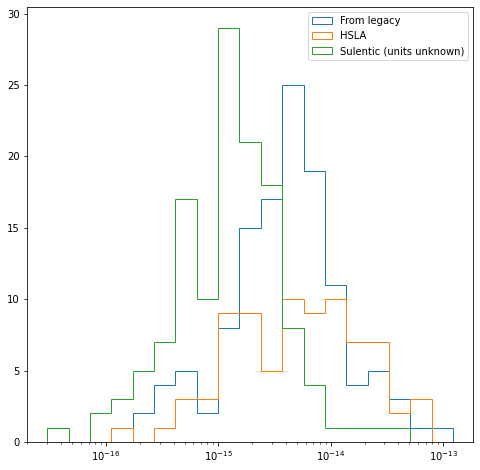

In [10]:
bins_log = np.logspace(np.log10(np.nanmin(f1550_sul)), np.log10(np.nanmax(f1450_tvm)), 20)

fig = plt.figure(figsize=(8,8))
plt.hist(f1450_tvm[~maskHSLA], bins=bins_log, histtype="step", label="From legacy")
plt.hist(f1450_tvm[maskHSLA], bins=bins_log, histtype="step", label="HSLA")
plt.hist(f1550_sul, bins=bins_log, histtype="step", label="Sulentic (units unknown)")
plt.xscale("log")
plt.legend(loc="best")
plt.show()

OK, maybe there isn't really an offset between the legacy spectra and HSLA (good!).  Sulentic measurements being a bit lower at 1550Å isn't too surprising since I'm measuring at 1450Å, but the discrepancy is bigger than expected assuming a median quasar spectrum (VB01).

---

Now figure out units of $F_\mathrm{BC}$ so we can save a column with EW from Sulentic+07 measurements.

In [11]:
Fint_sul = 1e-14*dat["FCIVBC"].values #suspect this is in units of 10^-14 erg/s/cm2
ew_sul = Fint_sul / f1550_sul

ew_tvm = dat["CIV_EW_tvm"].values

In [12]:
np.nanmedian(ew_tvm[~maskHSLA]), np.nanmedian(ew_tvm[maskHSLA]), np.nanmedian(ew_sul)

(58.166035663498306, 58.46610622694105, 76.19998185282641)

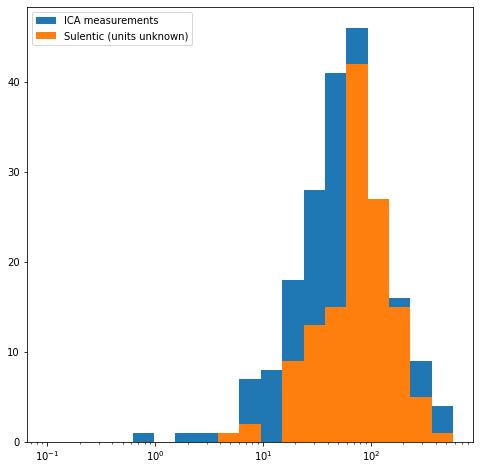

In [13]:
bins_logew = np.logspace(np.log10(0.1), np.log10(np.nanmax(ew_tvm)), 20)

fig = plt.figure(figsize=(8,8))
plt.hist(ew_tvm, bins=bins_logew, label="ICA measurements")
plt.hist(ew_sul, bins=bins_logew, label="Sulentic (units unknown)")
plt.xscale("log")
plt.legend(loc="best")
plt.show()

In [14]:
dat

,Final_Name,z,z_src,CIV_blue_tvm,CIV_EW_tvm,_RA,_DE,Inst_final,SDSS_NAME,PLATE,...,starPG_BblueoutlierZam02,Hbeta_fwhm_sul07,u_Hbeta_fwhm_sul07,RFeII_sul07,logR_sul07,Gamma_sul07,u_Gamma_sul07,F1550,FCIVBC,CIV_blue_sul07
0,PG1322+659,0.167400,Sul,542.446498,58.743636,200.956198,65.696727,FOS,NaN,NaN,...,*,3114.0,NaN,0.34,-1.00,3.00,NaN,1.20,7.9,310.0
1,Mrk205,0.071100,Sul,266.508764,88.957267,185.433196,75.310553,FOS,NaN,NaN,...,NaN,3783.0,NaN,0.21,-0.47,2.10,NaN,3.61,18.8,73.0
2,J132059.41+295728.1,0.206057,DR16,-1047.680512,25.257626,200.248000,29.957800,HSLA,132059.42+295728.1,11401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LBQS1138+0204,0.382100,Sul,1024.717970,9.097499,175.340622,1.800953,FOS,114121.75+014803.5,514.0,...,NaN,4225.0,NaN,0.92,-1.00,0.00,NaN,0.54,1.8,536.0
4,J15395+4735,0.772300,Sul,611.392209,33.244469,234.895083,47.592000,FOS,153934.80+473531.2,6729.0,...,*,5857.0,NaN,0.34,1.18,1.96,NaN,2.42,15.7,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3C095,0.616000,Sul,-147.881870,27.935926,57.869083,-14.485611,FOS,NaN,NaN,...,NaN,9516.0,NaN,0.22,2.79,2.34,NaN,3.94,20.2,78.0
204,J084349.75+261910.7,0.257100,DR16,-217.001833,43.282429,130.957000,26.319700,HSLA,084349.75+261910.7,11123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,J10104+4132,0.612600,Sul,59.381212,73.844719,152.614698,41.544181,FOS,101027.52+413239.0,8302.0,...,NaN,2964.0,NaN,0.22,2.76,2.00,NaN,1.83,17.6,-59.0
206,UM355,0.260000,Sul,-1047.680512,322.794942,24.988842,1.529492,FOS,NaN,NaN,...,NaN,11245.0,NaN,0.09,3.09,1.93,NaN,0.13,3.3,-1930.0


In [15]:
dat

,Final_Name,z,z_src,CIV_blue_tvm,CIV_EW_tvm,_RA,_DE,Inst_final,SDSS_NAME,PLATE,...,starPG_BblueoutlierZam02,Hbeta_fwhm_sul07,u_Hbeta_fwhm_sul07,RFeII_sul07,logR_sul07,Gamma_sul07,u_Gamma_sul07,F1550,FCIVBC,CIV_blue_sul07
0,PG1322+659,0.167400,Sul,542.446498,58.743636,200.956198,65.696727,FOS,NaN,NaN,...,*,3114.0,NaN,0.34,-1.00,3.00,NaN,1.20,7.9,310.0
1,Mrk205,0.071100,Sul,266.508764,88.957267,185.433196,75.310553,FOS,NaN,NaN,...,NaN,3783.0,NaN,0.21,-0.47,2.10,NaN,3.61,18.8,73.0
2,J132059.41+295728.1,0.206057,DR16,-1047.680512,25.257626,200.248000,29.957800,HSLA,132059.42+295728.1,11401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LBQS1138+0204,0.382100,Sul,1024.717970,9.097499,175.340622,1.800953,FOS,114121.75+014803.5,514.0,...,NaN,4225.0,NaN,0.92,-1.00,0.00,NaN,0.54,1.8,536.0
4,J15395+4735,0.772300,Sul,611.392209,33.244469,234.895083,47.592000,FOS,153934.80+473531.2,6729.0,...,*,5857.0,NaN,0.34,1.18,1.96,NaN,2.42,15.7,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3C095,0.616000,Sul,-147.881870,27.935926,57.869083,-14.485611,FOS,NaN,NaN,...,NaN,9516.0,NaN,0.22,2.79,2.34,NaN,3.94,20.2,78.0
204,J084349.75+261910.7,0.257100,DR16,-217.001833,43.282429,130.957000,26.319700,HSLA,084349.75+261910.7,11123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,J10104+4132,0.612600,Sul,59.381212,73.844719,152.614698,41.544181,FOS,101027.52+413239.0,8302.0,...,NaN,2964.0,NaN,0.22,2.76,2.00,NaN,1.83,17.6,-59.0
206,UM355,0.260000,Sul,-1047.680512,322.794942,24.988842,1.529492,FOS,NaN,NaN,...,NaN,11245.0,NaN,0.09,3.09,1.93,NaN,0.13,3.3,-1930.0
